In [68]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [69]:
Amazon_devices = pd.read_csv("Amazon_devices.csv")
Amazon_devices

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",$39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",$24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",$44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",$44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",$39.00
...,...,...,...,...,...,...
18095,2021-07-31,96,Tile Slim (2020) 1-pack - Slim & Sleek Bluetoo...,4.6,"25,512",$28.73
18096,2021-07-31,97,"Blink Outdoor - wireless, weather-resistant HD...",4.4,"60,859",$99.99
18097,2021-07-31,98,EVISTR 16GB Digital Voice Recorder Voice Activ...,4.4,"12,196",$39.99
18098,2021-07-31,99,"Echo (4th Gen) | With premium sound, smart hom...",4.7,"71,566",$69.99


In [70]:
Amazon_devices['price'] = Amazon_devices['price'].str.replace('$', '')
Amazon_devices

C:\Users\PAUL\AppData\Local\Temp\ipykernel_11456\1671795439.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Amazon_devices['price'] = Amazon_devices['price'].str.replace('$', '')


,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,"512,797",39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,"328,652",24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,"298,030",44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,"138,241",44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,"62,702",39.00
...,...,...,...,...,...,...
18095,2021-07-31,96,Tile Slim (2020) 1-pack - Slim & Sleek Bluetoo...,4.6,"25,512",28.73
18096,2021-07-31,97,"Blink Outdoor - wireless, weather-resistant HD...",4.4,"60,859",99.99
18097,2021-07-31,98,EVISTR 16GB Digital Voice Recorder Voice Activ...,4.4,"12,196",39.99
18098,2021-07-31,99,"Echo (4th Gen) | With premium sound, smart hom...",4.7,"71,566",69.99


In [71]:
Amazon_devices.dtypes

date         object
number        int64
name         object
rating       object
n_reviews    object
price        object
dtype: object

In [72]:
Amazon_devices['price'] = pd.to_numeric(Amazon_devices['price'], errors='coerce')

In [73]:
Amazon_devices[Amazon_devices['price'].isnull()]

,date,number,name,rating,n_reviews,price
19,2021-02-01,20,Nintendo Switch Pro Controller,4.9,"35,492",NaN
61,2021-02-01,62,Super Mario 3D All-Stars - Nintendo Switch,4.8,"33,272",NaN
89,2021-02-01,90,Super Smash Bros. Ultimate - Nintendo Switch,4.9,"38,645",NaN
124,2021-02-02,25,Nintendo Switch Pro Controller,4.9,"35,622",NaN
140,2021-02-02,41,"New Apple iPad (10.2-inch, Wi-Fi, 32GB) - Spac...",4.9,"22,316",NaN
...,...,...,...,...,...,...
15881,2021-07-09,82,Fire TV Stick streaming media player with Alex...,4.7,"459,118",NaN
16139,2021-07-12,40,"2021 Apple 12.9-inch iPad Pro (Wi‑Fi, 128GB) -...",4.8,389,NaN
16247,2021-07-13,48,"2021 Apple 12.9-inch iPad Pro (Wi‑Fi, 128GB) -...",4.8,406,NaN
16299,2021-07-13,100,2020 Apple MacBook Pro with Apple M1 Chip (13-...,4.8,"2,841",NaN


In [74]:
Amazon_devices['price'] = Amazon_devices['price'].fillna(0)

In [75]:
Amazon_devices['price']

0        39.99
1        24.99
2        44.99
3        44.99
4        39.00
         ...  
18095    28.73
18096    99.99
18097    39.99
18098    69.99
18099    30.99
Name: price, Length: 18100, dtype: float64

In [76]:
Amazon_devices['price'] = Amazon_devices['price'].replace('Not available', 0)

In [77]:
Amazon_devices['price'] = Amazon_devices['price'].astype(float)

In [78]:
Amazon_devices['price']

0        39.99
1        24.99
2        44.99
3        44.99
4        39.00
         ...  
18095    28.73
18096    99.99
18097    39.99
18098    69.99
18099    30.99
Name: price, Length: 18100, dtype: float64

In [79]:
Amazon_devices['n_reviews'] = Amazon_devices['n_reviews'].str.replace(',', '')

In [80]:
Amazon_devices['n_reviews']

0        512797
1        328652
2        298030
3        138241
4         62702
          ...  
18095     25512
18096     60859
18097     12196
18098     71566
18099      9157
Name: n_reviews, Length: 18100, dtype: object

In [81]:
Amazon_devices['n_reviews'] = Amazon_devices['n_reviews'].replace('No customer reviews yet', 0)

In [82]:
Amazon_devices[Amazon_devices['n_reviews'] == 0]

,date,number,name,rating,n_reviews,price
16,2021-02-01,17,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
128,2021-02-02,29,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
232,2021-02-03,33,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
334,2021-02-04,35,All-new Echo Show 10 (3rd Gen) | HD smart disp...,Not available,0,249.99
537,2021-02-06,38,"Binoculars 20x50, HD Professional/Waterproof B...",Not available,0,0.00
...,...,...,...,...,...,...
17858,2021-07-29,59,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,0,49.99
17929,2021-07-30,30,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,0,49.99
17947,2021-07-30,48,Echo Dot (4th Gen) Limited Edition | Diane von...,Not available,0,59.99
18032,2021-07-31,33,Mini Spy Camera - 1080p Hidden Camera With Aud...,Not available,0,49.99


In [83]:
Amazon_devices['n_reviews'] = Amazon_devices['n_reviews'].astype('int64')

In [84]:
Amazon_devices

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,512797,39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,328652,24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,298030,44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,138241,44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,62702,39.00
...,...,...,...,...,...,...
18095,2021-07-31,96,Tile Slim (2020) 1-pack - Slim & Sleek Bluetoo...,4.6,25512,28.73
18096,2021-07-31,97,"Blink Outdoor - wireless, weather-resistant HD...",4.4,60859,99.99
18097,2021-07-31,98,EVISTR 16GB Digital Voice Recorder Voice Activ...,4.4,12196,39.99
18098,2021-07-31,99,"Echo (4th Gen) | With premium sound, smart hom...",4.7,71566,69.99


In [85]:
Amazon_devices['rating'] = Amazon_devices['rating'].replace('Not available', 0)

In [86]:
Amazon_devices['rating'] = Amazon_devices['rating'].astype(float)

In [87]:
Amazon_devices['rating']

0        4.7
1        4.7
2        4.6
3        4.7
4        4.7
        ... 
18095    4.6
18096    4.4
18097    4.4
18098    4.7
18099    4.8
Name: rating, Length: 18100, dtype: float64

In [88]:
Amazon_devices.dtypes

date          object
number         int64
name          object
rating       float64
n_reviews      int64
price        float64
dtype: object

In [89]:
expensive_proucts = Amazon_devices.groupby('name')['price'].sum().sort_values(ascending = False)
expensive_proucts

name
Blink Outdoor - wireless, weather-resistant HD security camera, two-year battery life, motion detection, set up in…         45182.11
2020 Apple iPad (10.2-inch, Wi-Fi, 128GB) - Space Gray (8th Generation)                                                     32783.68
Acer Aspire 5 Slim Laptop, 15.6 inches Full HD IPS Display, AMD Ryzen 3 3200U, Vega 3 Graphics, 4GB DDR4, 128GB SSD…        27833.44
Fitbit Versa 2 Health and Fitness Smartwatch with Heart Rate, Music, Alexa Built-In, Sleep and Swim Tracking, Black…        27705.07
Ring Stick Up Cam Battery HD security camera with custom privacy controls, Simple setup, Works with Alexa - Black           26926.98
                                                                                                                              ...   
Victure 1080P FHD Baby Monitor Pet Camera 2.4G Wireless Indoor Home Security Camera with Two-Way Audio Motion Detection…        0.00
andfive Smart Watch, Fitness Tracker for Women, IP68 Waterproof 

In [90]:
Amazon_devices.head(5)

,date,number,name,rating,n_reviews,price
0,2021-02-01,1,Fire TV Stick 4K streaming device with Alexa V...,4.7,512797,39.99
1,2021-02-01,2,"Amazon Smart Plug, works with Alexa – A Certif...",4.7,328652,24.99
2,2021-02-01,3,Echo Show 5 -- Smart display with Alexa – stay...,4.6,298030,44.99
3,2021-02-01,4,"All-new Echo Dot (4th Gen, 2020 release) | Sma...",4.7,138241,44.99
4,2021-02-01,5,Roku Streaming Stick+ | HD/4K/HDR Streaming De...,4.7,62702,39.00


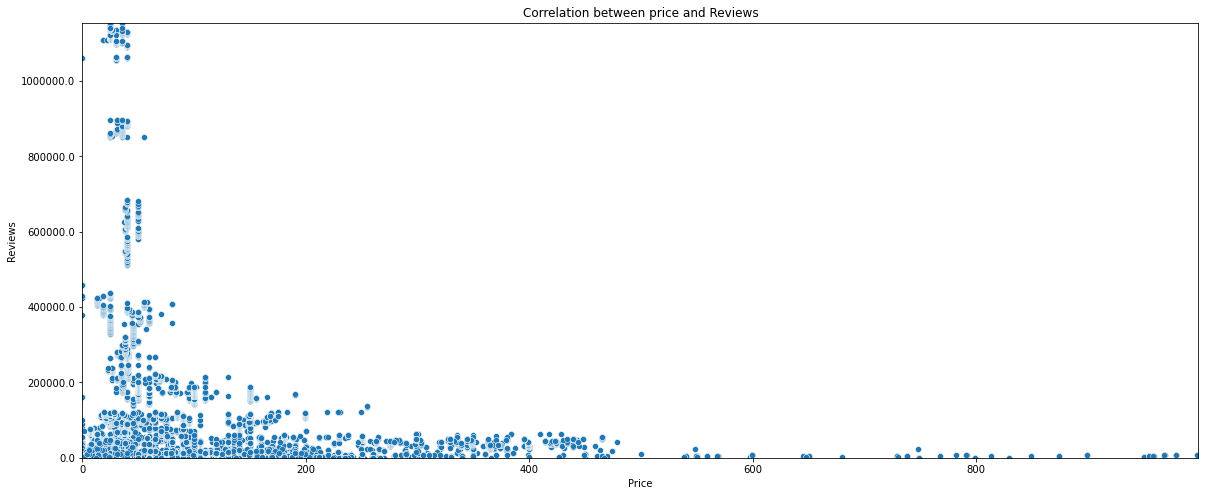

In [124]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='price', y='n_reviews', data = Amazon_devices)

# Set labels and title
plt.xlabel('Price')
plt.ylabel('Reviews')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.xlim(0,Amazon_devices['price'].max())
plt.ylim(0,Amazon_devices['n_reviews'].max())
plt.title('Correlation between price and Reviews')

# Display the plot
plt.show()

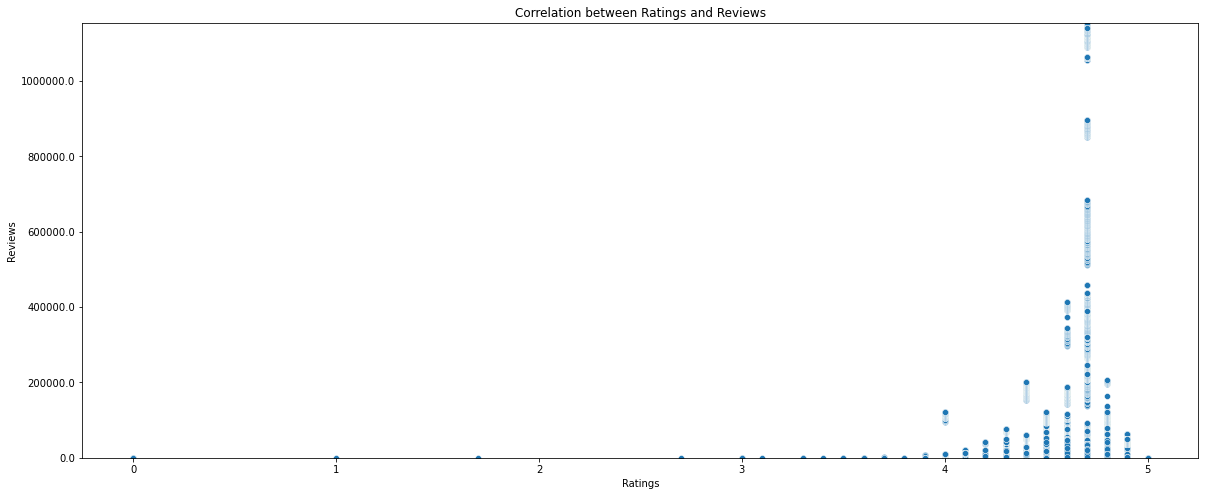

In [122]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='rating', y='n_reviews', data = Amazon_devices)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Reviews')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.ylim(0,Amazon_devices['n_reviews'].max())
plt.title('Correlation between Ratings and Reviews')

# Display the plot
plt.show()

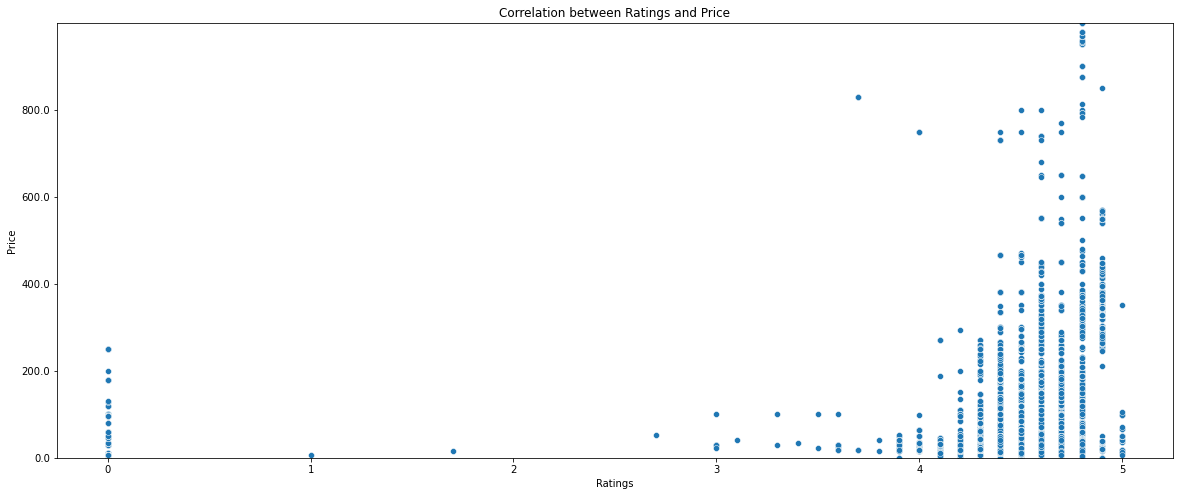

In [123]:
plt.figure(figsize = (20,8))
sns.scatterplot(x='rating', y='price', data = Amazon_devices)

# Set labels and title
plt.xlabel('Ratings')
plt.ylabel('Price')
plt.yticks(ticks= plt.yticks()[0], labels=plt.yticks()[0])
plt.title('Correlation between Ratings and Price')
plt.ylim(0,Amazon_devices['price'].max())

# Display the plot
plt.show() 